<a href="https://colab.research.google.com/github/nethranatarajan3/nethranatarajan3.github.io/blob/main/code/Graph7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#Loading Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

In [6]:
#Loading cluster data from GitHub
print("Loading data from GitHub...")
cluster_url = "https://github.com/nethranatarajan3/nethranatarajan3.github.io/raw/refs/heads/main/data/Aggregated_Data.csv"
cluster = pd.read_csv(cluster_url)


Loading data from GitHub...


In [7]:
#Defining features
feature_columns = [
    'IMR (2022)',
    '% Institutional Births ',
    'ANC Full Protocol',
    '% Children (12-23 months) Fully Immunised ',
    'PHC Density per 100,000',
    'Statewise Per Capita Healthcare Expenditure',
    'Number of Medical Colleges per 1 million',
    'Prevalence of diarrhoea in the 2 weeks preceding the survey (Children under age 5 years) (%) '
]

In [8]:
# Performing clustering
X = cluster[feature_columns].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

n_clusters = 3
clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
cluster['Cluster'] = clustering.fit_predict(X_scaled)

In [9]:
# Exporting cluster assignments for Vega-Lite
cluster_export = cluster[['State', 'Cluster']].copy()
cluster_export['State_For_Map'] = cluster_export['State']

# Saving for Vega-Lite
cluster_export[['State_For_Map', 'Cluster']].rename(columns={'State_For_Map': 'State'}).to_csv('cluster_assignments.csv', index=False)


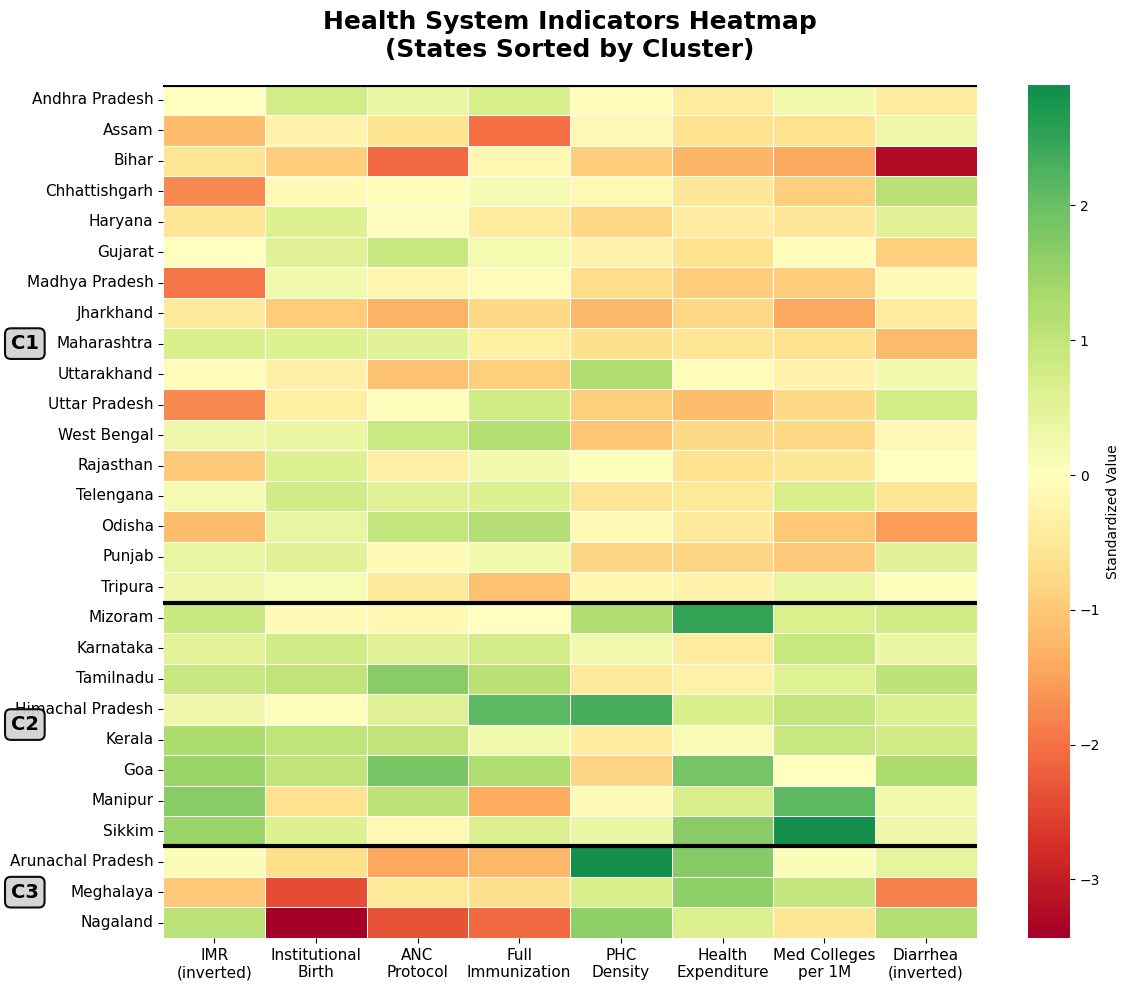

In [10]:

# Creating Heatmap
fig, ax = plt.subplots(figsize=(12, 10))

# Sorting states by cluster
cluster_sorted = cluster.sort_values('Cluster')
X_sorted = cluster_sorted[feature_columns].values
X_sorted_scaled = scaler.fit_transform(X_sorted)
state_names_sorted = cluster_sorted['State'].values

# Inverting the "lower is better" indicators
X_sorted_scaled[:, 0] = -X_sorted_scaled[:, 0]  # IMR
X_sorted_scaled[:, 7] = -X_sorted_scaled[:, 7]  # Diarrhea

# Feature labels
feature_labels = [
    'IMR\n(inverted)',
    'Institutional\nBirth',
    'ANC\nProtocol',
    'Full\nImmunization',
    'PHC\nDensity',
    'Health\nExpenditure',
    'Med Colleges\nper 1M',
    'Diarrhea\n(inverted)'
]

# Creating heatmap
sns.heatmap(X_sorted_scaled,
            yticklabels=state_names_sorted,
            xticklabels=feature_labels,
            cmap='RdYlGn',
            center=0,
            cbar_kws={'label': 'Standardized Value'},
            ax=ax,
            linewidths=0.5,
            linecolor='white')

ax.set_title('Health System Indicators Heatmap\n(States Sorted by Cluster)',
            fontsize=18, fontweight='bold', pad=20)
ax.tick_params(axis='y', labelsize=11)
ax.tick_params(axis='x', labelsize=11)

# Add cluster boundaries
clusters = cluster_sorted['Cluster'].values
cluster_changes = [0] + [i for i in range(1, len(clusters)) if clusters[i] != clusters[i-1]] + [len(clusters)]

for i in range(len(cluster_changes)-1):
    ax.axhline(cluster_changes[i], color='black', linewidth=3)
    mid_point = (cluster_changes[i] + cluster_changes[i+1]) / 2
    ax.text(-1.5, mid_point, f'C{i+1}',
            fontsize=14, fontweight='bold', va='center',
            bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.95, edgecolor='black', linewidth=1.5))

plt.tight_layout()
plt.savefig('cluster_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

